# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

## 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
!cd ../../python; pip install .

Processing /home/workspace/python
    100% |████████████████████████████████| 48.1MB 418kB/s ta 0:00:011  2% |▊                               | 1.1MB 14.0MB/s eta 0:00:04    5% |█▉                              | 2.7MB 10.2MB/s eta 0:00:05    6% |██▏                             | 3.3MB 22.7MB/s eta 0:00:02    9% |███                             | 4.4MB 12.1MB/s eta 0:00:04    11% |███▋                            | 5.5MB 10.9MB/s eta 0:00:04    12% |████                            | 6.0MB 9.2MB/s eta 0:00:05    13% |████▍                           | 6.6MB 17.1MB/s eta 0:00:03    16% |█████▏                          | 7.7MB 23.9MB/s eta 0:00:02    17% |█████▌                          | 8.2MB 7.6MB/s eta 0:00:06    18% |█████▉                          | 8.8MB 12.5MB/s eta 0:00:04    20% |██████▌                         | 9.8MB 9.8MB/s eta 0:00:04    22% |███████▏                        | 10.7MB 9.4MB/s eta 0:00:04    25% |████████▏                       | 12.3MB 22.6MB/s eta 0:00:02    27%

    100% |████████████████████████████████| 133kB 4.7MB/s ta 0:00:01
    100% |████████████████████████████████| 122kB 4.4MB/s ta 0:00:01
    100% |████████████████████████████████| 389kB 6.3MB/s ta 0:00:011  18% |██████                          | 71kB 7.6MB/s eta 0:00:01
    100% |████████████████████████████████| 71kB 4.6MB/s ta 0:00:01
    100% |████████████████████████████████| 2.2MB 4.9MB/s ta 0:00:011   14% |████▌                           | 307kB 8.8MB/s eta 0:00:01    50% |████████████████▏               | 1.1MB 8.1MB/s eta 0:00:01    66% |█████████████████████▏          | 1.4MB 8.5MB/s eta 0:00:01    88% |████████████████████████████▏   | 1.9MB 8.3MB/s eta 0:00:01


  Running setup.py bdist_wheel for unityagents ... done
  Stored in directory: /tmp/pip-ephem-wheel-cache-r0qojmge/wheels/97/7a/24/09937717b9737178ae827bcef33ba219b540efd55be210010c
  Running setup.py bdist_wheel for docopt ... done
  Stored in directory: /root/.cache/pip/wheels/9b/04/dd/7daf4150b6d9b12949298737de9431a324d4b797ffd63f526e
  Running setup.py bdist_wheel for termcolor ... done
  Stored in directory: /root/.cache/pip/wheels/7c/06/54/bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
Successfully built unityagents docopt termcolor
tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.28 which is incompatible.
  Found existing installation: protobuf 3.5.1
    Uninstalling protobuf-3.5.1:
      Successfully uninstalled protobuf-3.5.1
  Found existing installation: tensorflow 1.3.0
    Uninstalling tensorflow-1.3.0:
      Successfully un

In [2]:
from workspace_utils import keep_awake
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [3]:
env = UnityEnvironment(file_name="Tennis_Linux_NoVis/Tennis.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

## 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]


## 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [18]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.0
Score (max over agents) from episode 2: 0.0
Score (max over agents) from episode 3: 0.0
Score (max over agents) from episode 4: 0.0


KeyboardInterrupt: 

When finished, you can close the environment.

In [7]:
env.close()

## 4. It's Your Turn!

In [6]:
import torch
from collections import deque
import matplotlib.pyplot as plt
from importlib import reload
#from workspace_utils import keep_awake

#from maddpg import MAgent
from importlib import reload
import maddpg
maddpg = reload(maddpg)
MAgent = maddpg.MAgent

In [7]:
def run_ddpg_multi(agent, n_episodes=5000, queue=100, print_every=50):        
    """Multi Deep Deterministic Policy Gradient learning for Tennis Unity Environment.
    
    Params Input
    ==========
        agent (MAgent): The agent class
        n_episode (int): maximum number of episodes
        queue (int): number of consecutive episodes to average up
        print_every (int): frequency of printing information throughout iteration.
        
    Params Output
    ==========
        scores_all (list of floats): are the scores collected at the end of each episode
        
    """
    
    ##Inizialization
    scores_window = deque(maxlen=queue)     
    scores_all = []        
    moving_avgs = []
    for i_episode in keep_awake(range(1, n_episodes+1)):
        env_info = env.reset(train_mode=True)[brain_name]      
        states = env_info.vector_observations
        agent.reset()
        scores = np.zeros(2)
        
        ## Training loop of each episode
        while True:
            actions = agent.act(states, add_noise=True)
            env_info = env.step(actions)[brain_name]           
            next_states = env_info.vector_observations         
            rewards = env_info.rewards                         
            dones = env_info.local_done
            agent.step(states, actions, rewards, next_states, dones)
            scores += rewards                                  
            states = next_states                               
            if np.any(dones):                                  
                break

        scores_window.append(np.max(scores)) # take the max of the two agents
        scores_all.append(np.max(scores))
        
        moving_avg = np.mean(scores_window)  # calculate moving average
        moving_avgs.append(moving_avg)       # save most recent moving average
        
        #print('Episode {} ## Reward 1 agent: {:.3f} ##  Reward 2 : {:.3f} ## Max: {:.3f} ## Average: {:.2f}'.format(
        #        i_episode, scores[0], scores[1], np.max(scores), np.mean(scores_window)), end="")
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        
        if np.mean(scores_window)>=0.5 and i_episode >= queue:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.3f}'.format(
                i_episode, np.mean(scores_window)))
            torch.save(agent.agents[0].actor_local.state_dict(), 'checkpoint_actor0.pth')
            torch.save(agent.agents[0].critic_local.state_dict(), 'checkpoint_critic0.pth')
            torch.save(agent.agents[1].actor_local.state_dict(), 'checkpoint_actor1.pth')
            torch.save(agent.agents[1].critic_local.state_dict(), 'checkpoint_critic1.pth')
            break

    return scores_all, moving_avgs

### Original

- BUFFER_SIZE = int(1e5)  # replay buffer size
- BATCH_SIZE = 128        # minibatch size
- GAMMA = 0.99            # discount factor
- TAU = 6e-2              # for soft update of target parameters
- LR_ACTOR = 1e-4         # learning rate of the actor
- LR_CRITIC = 1e-3        # learning rate of the critic
- WEIGHT_DECAY = 0        # L2 weight decay
- UPDATE_EVERY = 1        # Update every time step
- NUM_UPDATE = 1          # Update once at each time step

In [8]:
agent = MAgent(state_size, action_size, 42, num_agents=num_agents)
scores, avgs = run_ddpg_multi(agent, n_episodes=5000, queue=100)

Episode 50	Average Score: 0.01
Episode 100	Average Score: 0.01
Episode 150	Average Score: 0.03
Episode 200	Average Score: 0.07
Episode 250	Average Score: 0.09
Episode 300	Average Score: 0.10
Episode 350	Average Score: 0.13
Episode 400	Average Score: 0.17
Episode 450	Average Score: 0.29
Episode 500	Average Score: 0.43
Episode 550	Average Score: 0.43
Episode 600	Average Score: 0.44
Episode 637	Average Score: 0.51
Environment solved in 637 episodes!	Average Score: 0.512


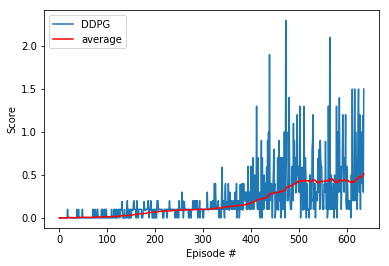

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='DDPG')
plt.plot(np.arange(len(scores)), avgs, c='r', label='average')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left');
plt.show()

### Iteration 2

Here I increased the buffer size.

- BUFFER_SIZE = int(1e6)  # replay buffer size

In [11]:
maddpg.BUFFER_SIZE = int(1e6)

In [12]:
agent = maddpg.MAgent(state_size, action_size, 42, num_agents=num_agents)
scores, avgs = run_ddpg_multi(agent, n_episodes=5000, queue=100)

Episode 50	Average Score: 0.01
Episode 100	Average Score: 0.01
Episode 150	Average Score: 0.03
Episode 200	Average Score: 0.06
Episode 250	Average Score: 0.07
Episode 300	Average Score: 0.08
Episode 350	Average Score: 0.09
Episode 400	Average Score: 0.11
Episode 450	Average Score: 0.14
Episode 500	Average Score: 0.18
Episode 550	Average Score: 0.23
Episode 600	Average Score: 0.29
Episode 650	Average Score: 0.31
Episode 700	Average Score: 0.35
Episode 750	Average Score: 0.38
Episode 800	Average Score: 0.47
Episode 815	Average Score: 0.51
Environment solved in 815 episodes!	Average Score: 0.509


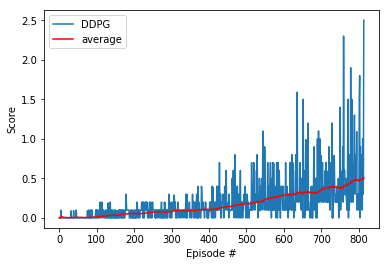

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='DDPG')
plt.plot(np.arange(len(scores)), avgs, c='r', label='average')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left')
plt.show()

### Iteration 3

In [12]:
maddpg.UPDATE_EVERY = 4        # Update every time step
maddpg.NUM_UPDATE = 2          # Update once at each time step

In [13]:
agent = maddpg.MAgent(state_size, action_size, 42, num_agents=num_agents)
scores, avgs = run_ddpg_multi(agent, n_episodes=5000, queue=100)

Episode 50	Average Score: 0.01
Episode 100	Average Score: 0.00
Episode 150	Average Score: 0.00
Episode 200	Average Score: 0.00
Episode 250	Average Score: 0.02
Episode 300	Average Score: 0.03
Episode 350	Average Score: 0.03
Episode 400	Average Score: 0.06
Episode 450	Average Score: 0.09
Episode 500	Average Score: 0.09
Episode 550	Average Score: 0.09
Episode 600	Average Score: 0.09
Episode 650	Average Score: 0.09
Episode 700	Average Score: 0.09
Episode 750	Average Score: 0.10
Episode 800	Average Score: 0.10
Episode 850	Average Score: 0.11
Episode 900	Average Score: 0.11
Episode 950	Average Score: 0.10
Episode 1000	Average Score: 0.11
Episode 1050	Average Score: 0.11
Episode 1100	Average Score: 0.12
Episode 1150	Average Score: 0.14
Episode 1200	Average Score: 0.19
Episode 1250	Average Score: 0.23
Episode 1300	Average Score: 0.25
Episode 1350	Average Score: 0.24
Episode 1400	Average Score: 0.25
Episode 1450	Average Score: 0.30
Episode 1500	Average Score: 0.28
Episode 1550	Average Score: 0.

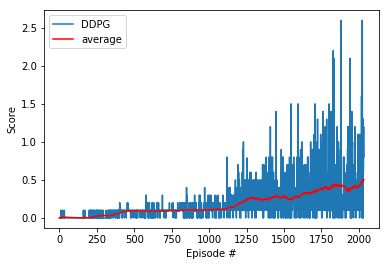

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='DDPG')
plt.plot(np.arange(len(scores)), avgs, c='r', label='average')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left')
plt.show()

### Iteration 4

In [10]:
maddpg = reload(maddpg)
MAgent = maddpg.MAgent

maddpg.BATCH_SIZE = 256

In [11]:
agent = maddpg.MAgent(state_size, action_size, 42, num_agents=num_agents)
scores, avgs = run_ddpg_multi(agent, n_episodes=5000, queue=100)

Episode 50	Average Score: 0.01
Episode 100	Average Score: 0.03
Episode 150	Average Score: 0.06
Episode 200	Average Score: 0.09
Episode 250	Average Score: 0.11
Episode 300	Average Score: 0.13
Episode 350	Average Score: 0.15
Episode 400	Average Score: 0.15
Episode 450	Average Score: 0.15
Episode 500	Average Score: 0.23
Episode 550	Average Score: 0.27
Episode 600	Average Score: 0.25
Episode 650	Average Score: 0.32
Episode 700	Average Score: 0.37
Episode 750	Average Score: 0.37
Episode 800	Average Score: 0.38
Episode 850	Average Score: 0.41
Episode 900	Average Score: 0.47
Episode 950	Average Score: 0.44
Episode 1000	Average Score: 0.39
Episode 1050	Average Score: 0.42
Episode 1100	Average Score: 0.46
Episode 1110	Average Score: 0.50
Environment solved in 1110 episodes!	Average Score: 0.500


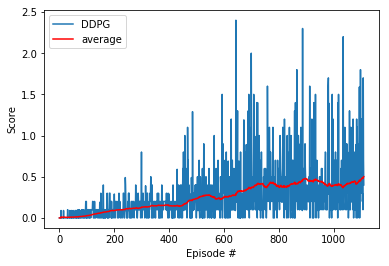

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='DDPG')
plt.plot(np.arange(len(scores)), avgs, c='r', label='average')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left')
plt.show()

### Iteration 5

In [8]:
maddpg = reload(maddpg)
MAgent = maddpg.MAgent

maddpg.TAU = 1e-2

0.06

In [ ]:
agent = maddpg.MAgent(state_size, action_size, 42, num_agents=num_agents)
scores, avgs = run_ddpg_multi(agent, n_episodes=5000, queue=100)

Episode 50	Average Score: 0.00
Episode 100	Average Score: 0.01
Episode 150	Average Score: 0.03
Episode 200	Average Score: 0.04
Episode 250	Average Score: 0.04
Episode 300	Average Score: 0.04
Episode 350	Average Score: 0.05
Episode 400	Average Score: 0.06
Episode 450	Average Score: 0.08
Episode 500	Average Score: 0.10
Episode 550	Average Score: 0.11
Episode 600	Average Score: 0.12
Episode 650	Average Score: 0.14
Episode 700	Average Score: 0.14
Episode 750	Average Score: 0.16
Episode 800	Average Score: 0.19
Episode 850	Average Score: 0.20
Episode 900	Average Score: 0.21
Episode 950	Average Score: 0.25
Episode 1000	Average Score: 0.30
Episode 1050	Average Score: 0.33
Episode 1100	Average Score: 0.43
Episode 1150	Average Score: 0.46
Episode 1200	Average Score: 0.45
Episode 1250	Average Score: 0.46
Episode 1272	Average Score: 0.46

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='DDPG')
plt.plot(np.arange(len(scores)), avgs, c='r', label='average')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left')
plt.show()

In [ ]:
### Iteration 3

XYZ

- BUFFER_SIZE = int(1e6)  # replay buffer size
- UPDATE_EVERY = 4        # Update every time step
- NUM_UPDATE = 2          # Update once at each time step

- BATCH_SIZE = 256        # minibatch size

- TAU = 1e-2              # for soft update of target parameters (try some others)


### Play

In [126]:
import torch
from maddpg import MAgent
from importlib import reload
import maddpg
maddpg = reload(maddpg)
MAgent = maddpg.MAgent

In [127]:
agent = MAgent(state_size, action_size, 42, num_agents=num_agents)

In [128]:
env_info = env.reset(train_mode=True)[brain_name]      
states = env_info.vector_observations
agent.reset() # Resets the noise
scores = np.zeros(2)

In [129]:
#while True:
for _ in range(500):
    actions = agent.act(states, add_noise=True)
    # Take a step in the environment
    env_info = env.step(actions)[brain_name]
    # What do we get with the step
    next_states = env_info.vector_observations        
    rewards = env_info.rewards                         
    dones = env_info.local_done
    # Tell the agent
    #for i in range(2):
    #    agent.agents[i].memory.add(states[i], actions[i], rewards[i], next_states[i], dones[i])
    agent.step(states, actions, rewards, next_states, dones)
    scores += rewards                                  
    states = next_states                               
    if np.any(dones):                                  
        break

#### Play

In [ ]:
ma_agent = MAgent(state_size, action_size, 42, num_agents=num_agents)

In [9]:
env_info = env.reset(train_mode=True)[brain_name]     # reset the environment

In [51]:
env_info.rewards

[0.0, 0.0]

In [10]:
states = env_info.vector_observations                  # get the current state (for each agent)

In [11]:
states.shape # state size is 8 but then stack on 3 so get 24

(2, 24)

In [17]:
actions = np.random.randn(num_agents, action_size)

In [18]:
actions

array([[-0.59609264,  0.66533179],
       [ 1.46914752, -2.76437587]])

In [19]:
actions = np.clip(actions, -1, 1)

In [20]:
actions

array([[-0.59609264,  0.66533179],
       [ 1.        , -1.        ]])

In [ ]:
states = torch.from_numpy(states).float()

In [42]:
actions = []
for i in range(2):
    agent = ma_agent.agents[i]
    agent.actor_local.eval()
    with torch.no_grad():
        action = agent.actor_local(states[i].unsqueeze(0)).cpu().data.numpy().squeeze()
    agent.actor_local.train()
    actions.append(action)

In [45]:
np.array(actions).shape

(2, 2)

In [48]:
ma_agent.noise.sample()

(2, 2)

In [27]:
 ma_agent.agents[0].actor_local(states)

tensor(1.00000e-02 *
       [[-1.0191,  1.3385],
        [-1.0034,  1.5844]])

In [32]:
agent.actor_local.eval()
ma_agent.agents[0].actor_local(states[0].unsqueeze(0))

ValueError: Expected more than 1 value per channel when training, got input size [1, 256]

In [60]:
torch.cat((torch.from_numpy(states), torch.from_numpy(states)), dim=1).shape

torch.Size([2, 48])

In [56]:
torch.

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -7.98256969, -1.5       , -0.        ,  0.        ,
        -7.11741829,  5.91759634, -0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -7.40637112, -1.5       ,  0.        ,  0.        ,
         7.11741829,  5.91759634,  0.        ,  0.        ]])

In [ ]:
ma_agent.agents[0].memory.add(states[0], actions[0], rewards[0], next_states[0], dones[i])